 – BUSINESS UNDERSTANDING
===============================


PROJECT: Cellphone Price Range Prediction

- Business Objective:
Bob wants to compete with major mobile companies by pricing his phones correctly.
The goal is NOT to predict exact price, but to classify phones into price ranges:
0 = Low cost
1 = Medium cost
2 = High cost
3 = Very High cost

- ML Objective:
Build and compare multiple classification models to predict price_range
based on mobile specifications and recommend the best model for production.


# – IMPORT LIBRARIES

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# – LOAD DATASET

- Loads the CSV dataset containing mobile phone specifications and price range.


In [7]:
# Load dataset
df = pd.read_csv("CPPtrain.csv") 
# View first 5 records
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# – BASIC DATA INSPECTION

In [6]:
# Dataset dimensions
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
# Data types and memory info
df.info()

Rows: 2000
Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null 

# – STATISTICAL SUMMARY

In [5]:
# Statistical description of numerical features
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# – CHECK MISSING VALUES

- Checks whether dataset contains missing values.
This dataset is already clean.


In [9]:
# Missing value analysis
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# – EXPLORATORY DATA ANALYSIS 

- Check if target classes are balanced.
Balanced data improves model stability.


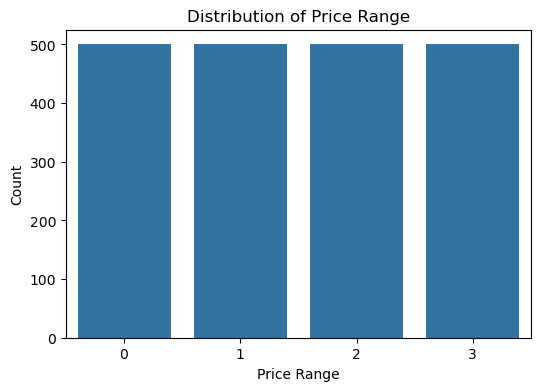

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="price_range", data=df)
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


Insight:
Target variable is perfectly balanced, which is ideal for classification.

# UNIVARIATE ANALYSIS (EDA)

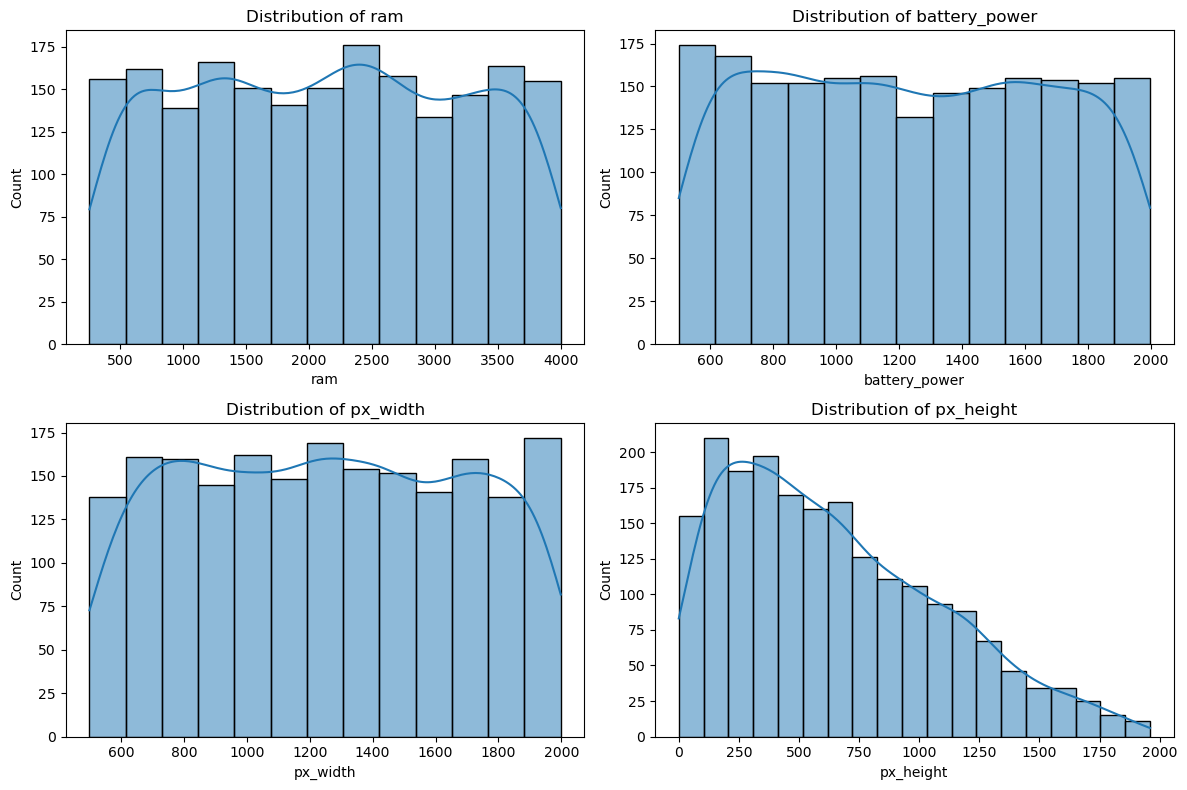

In [12]:
# Distribution of important numeric features
features = ["ram", "battery_power", "px_width", "px_height"]

plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Insight:
RAM and battery power show wide spread → strong predictors of price.

# BIVARIATE ANALYSIS (EDA)

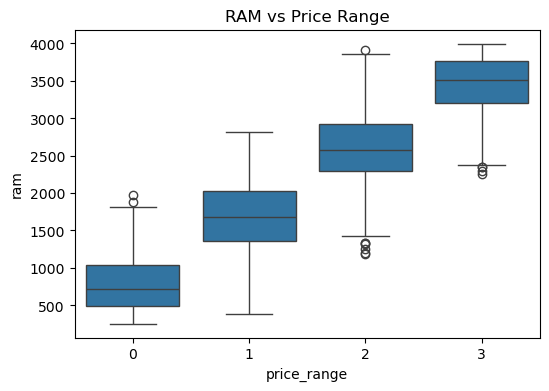

In [13]:
# RAM vs Price Range
plt.figure(figsize=(6,4))
sns.boxplot(x="price_range", y="ram", data=df)
plt.title("RAM vs Price Range")
plt.show()


Insight:
Higher RAM clearly corresponds to higher price categories.

# CORRELATION HEATMAP
- Correlation analysis to understand feature relationships
and their impact on price_range.

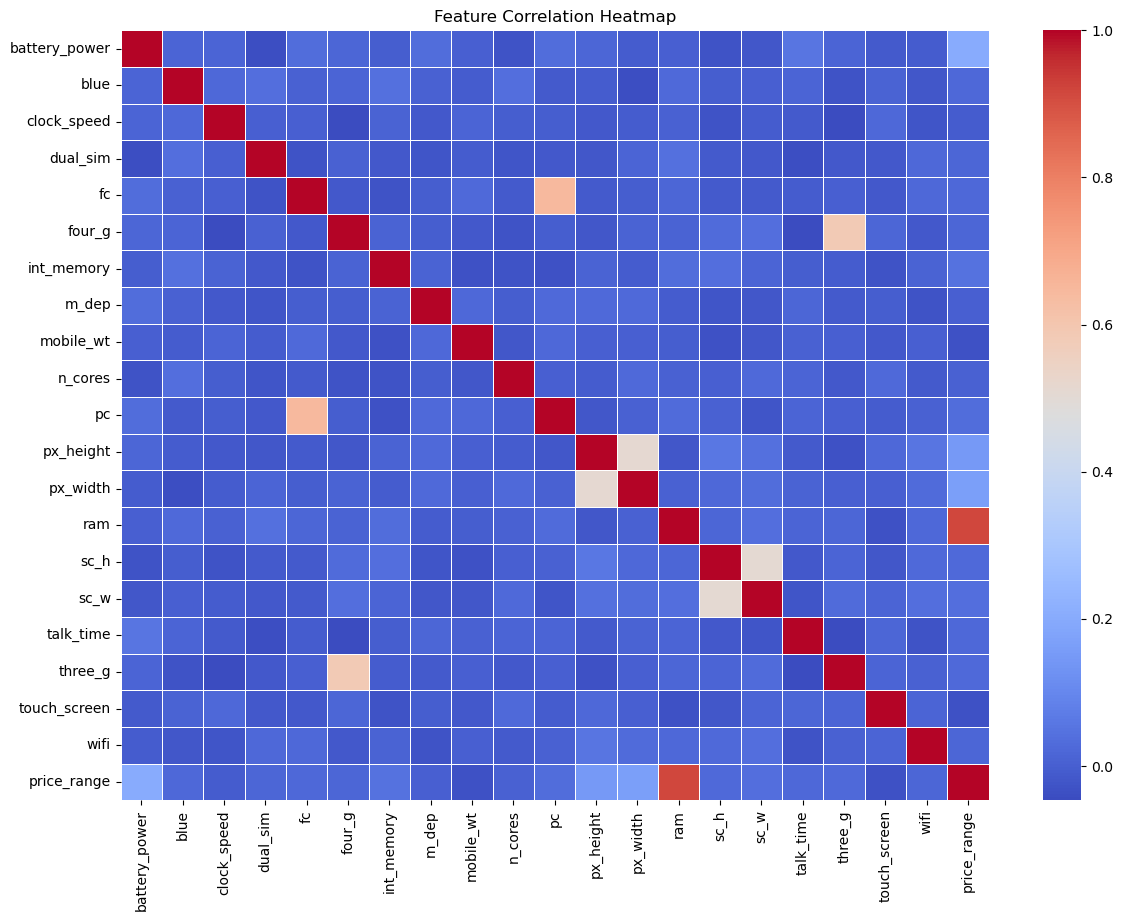

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Insight:
RAM, pixel resolution, and battery power have strong correlation with price.

# – FEATURE & TARGET SPLIT

- Separate independent variables (X) and target variable (y).


In [16]:
X = df.drop("price_range", axis=1)
y = df["price_range"]


# – TRAIN TEST SPLIT
- Splits data into training and testing sets.
80% training, 20% testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# – FEATURE SCALING
-> StandardScaler is used because:

- Models like Logistic Regression and KNN are distance-based

- Features have different scales (RAM, battery, pixels)

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling
Required for Logistic Regression and KNN due to distance-based calculations.

# – LOGISTIC REGRESSION
- Baseline classification model.
Works well for linearly separable data.

In [19]:
lr = LogisticRegression(max_iter=1000, multi_class="ovr")
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.8225


# – KNN CLASSIFIER
- KNN uses distance between data points.
Sensitive to scaling – hence StandardScaler.

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KNN Accuracy: 0.5


– DECISION TREE CLASSIFIER
===============================


- Tree-based model.
Captures non-linear relationships without scaling dependency.


In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.83


– RANDOM FOREST CLASSIFIER
===============================


- Ensemble model combining multiple decision trees.
Reduces overfitting and improves accuracy.


In [22]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8775


– MODEL COMPARISON TABLE
===============================


- Comparison of all models for final selection.


In [23]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred)
    ]
})

results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
3,Random Forest,0.8775
2,Decision Tree,0.8300
0,Logistic Regression,0.8225
1,KNN,0.5000


# – BEST MODEL 

In [29]:
# Find the row with the highest accuracy
best_row = results.loc[results["Accuracy"].idxmax()]

print("Best Model:", best_row["Model"])
print("Accuracy:", best_row["Accuracy"])


Best Model: Random Forest
Accuracy: 0.8775


– CONFUSION MATRIX (BEST MODEL)
===============================


- Evaluate Random Forest in detail as it performs best.


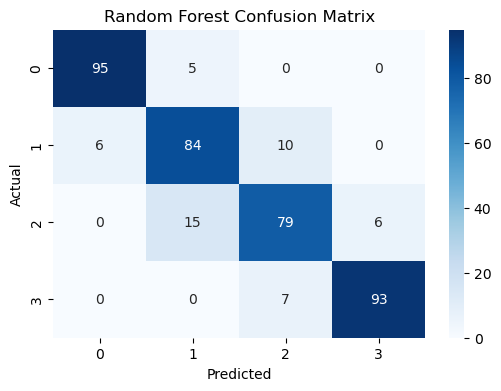

In [24]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


– CLASSIFICATION REPORT
===============================


- Precision, Recall, and F1-score for each price range.


In [26]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



– FEATURE IMPORTANCE
===============================


- Identifies which mobile specifications influence price most.
Helps business decision-making.


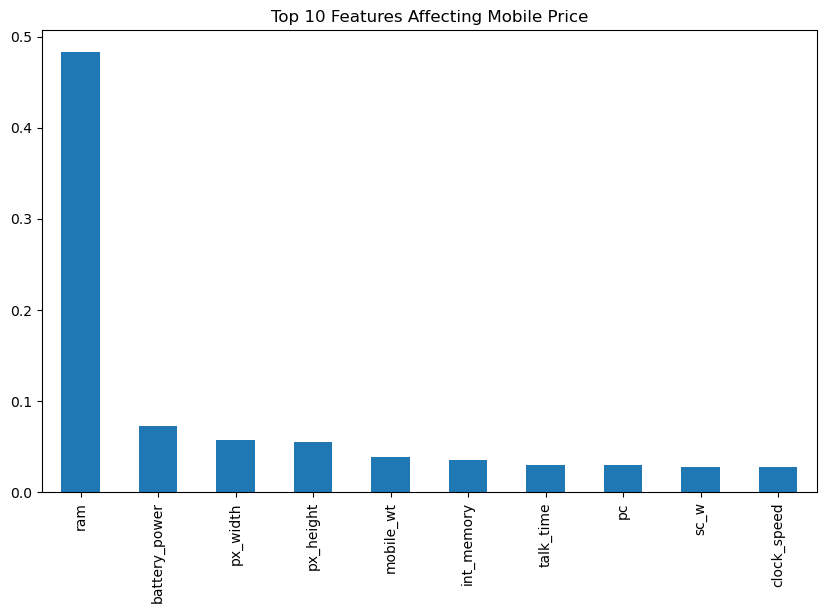

In [27]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Features Affecting Mobile Price")
plt.show()


# – FINAL CONCLUSION


Random Forest Classifier is the best model for production because:

- Highest accuracy

- Handles non-linear relationships

- Provides feature importance for business insights

- This model can directly support pricing strategy decisions.


– CHALLENGES FACED
===============================
Challenges & Solutions:
1. Different feature scales -> StandardScaler
2. Multi-class classification -> appropriate evaluation metrics
3. Feature importance -> Random Forest
4. Model selection -> comparison table

– BUSINESS INSIGHTS
===============================

Business Insights:
 - RAM is the most critical factor in pricing
 - Battery power and display resolution strongly influence price
 - Connectivity features enhance mid-range pricing
 - Helps company design phones by price segment strategically
